# The Spark Foundation

#  TASK -1  

# Prediction Using Spervised Learning

# Presented By- Sandeep Kumar

 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [3]:
data=pd.read_csv("http://bit.ly/w-data")
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
data.shape

(25, 2)

In [5]:
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
data.describe()


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
sns.set_style('darkgrid')

Text(0, 0.5, 'Scores')

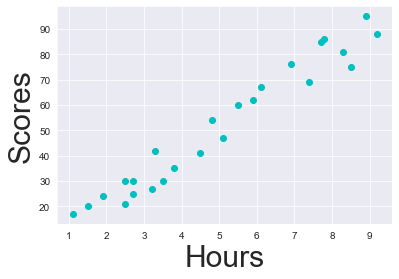

In [8]:
plt.plot(data['Hours'],data['Scores'],'oc')
plt.xlabel('Hours',fontsize=30)
plt.ylabel('Scores',fontsize=30)

<AxesSubplot:>

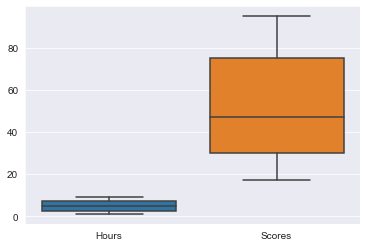

In [9]:
sns.boxplot(data=data[["Hours","Scores"]])

In [10]:
x=data.iloc[:,:-1].values

In [13]:
y=data.iloc[:,1].values

In [14]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10,random_state=0)


In [16]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

ploting training regression line

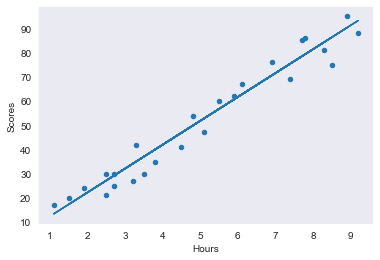

In [45]:
line=regressor.coef_*x+regressor.intercept_
data.plot.scatter(x="Hours",y="Scores")
plt.plot(x,line);
plt.grid()
plt.show()

In [24]:
y_pred=regressor.predict(x_test)
print(y_pred)

[17.30220982 34.05529402 75.44526674]


In [48]:
data_compare=pd.DataFrame({"actualscore":y_test,"predicted score":y_pred})
data_compare

,actualscore,predicted score
0,20,17.302210
1,27,34.055294
2,69,75.445267


In [49]:
my_hours=np.array([[9.25]])
my_pred=regressor.predict(my_hours)
print("No of Hours={}".format(my_hours[0][0]))
print("predicted score={}",format(my_pred[0]))

No of Hours=9.25
predicted score={} 93.67656425238499


In [29]:
import sklearn.metrics as metrics

explained_variance=metrics.explained_variance_score(y_test,y_pred)
mean_absolute_error=metrics.mean_absolute_error(y_test,y_pred)
mse=metrics.mean_squared_error(y_test,y_pred)
mean_squared_log_error=metrics.mean_squared_log_error(y_test,y_pred)
median_absolute_error=metrics.median_absolute_error(y_test,y_pred)
r2=metrics.r2_score(y_test,y_pred)

print('explained variance:',round(explained_variance,4))
print('mean_squared_log_error:',round(mean_squared_log_error,4))
print('r2:',round(r2,4))
print('MAE:',round(r2,4))
print('MSE:',round(mse,4))
print('RMSE:',round(np.sqrt(mse),4))


explained variance: 0.9575
mean_squared_log_error: 0.0257
r2: 0.9298
MAE: 0.9298
MSE: 32.8656
RMSE: 5.7329
